- seaborn 이란?  

 matplotlib을 기반으로 만들어진 통계데이터 시각화에 최적화된 라이브러리.  
 pandas DataFrame과 호환이 잘 된다.  
 

In [1]:
#seaborn 및 주요 모듈 import하기 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#배운것을 복습해보기 위해 샘플데이터를 불러보자.
tips=sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

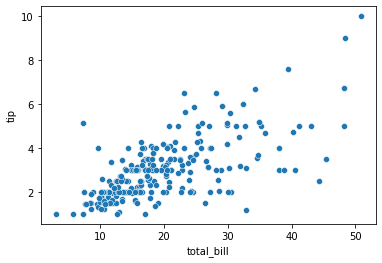

In [3]:
#scatter plot 만들어보기 
# x축을 음식값의 총액, y축을 팁으로 정함, 음식값이 많이 나올수록 팁도 많다. 
sns.scatterplot(x="total_bill",y="tip",data=tips)

- Hue는 무엇인가?  
  seaborn에서 데이터를 시각화 할때 색깔을 나누는 기준이된다.  
  범주를 색깔로 구분하여 표기하는것을 의미함.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

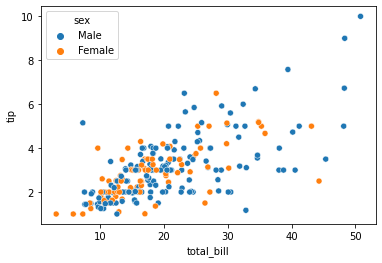

In [4]:
#위의 데이터에서 hue를 넣어 다시 시각화를 해보자.
# 1. 성별에 따른 구분
sns.scatterplot(x="total_bill",y="tip",data=tips,hue="sex")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

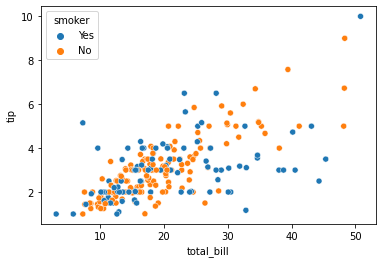

In [5]:
# 2. 흡연자,비흡연자의 구분
sns.scatterplot(x="total_bill",y="tip",data=tips,hue="smoker")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

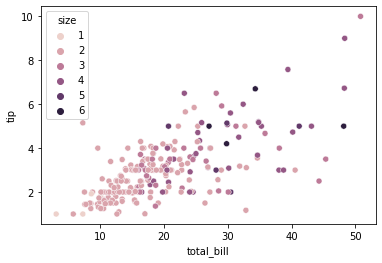

In [8]:
#hue를 size 기준으로 만드는것도 가능하다.
sns.scatterplot(x="total_bill",y="tip",data=tips,hue="size")

- size는 위의 smoker나 sex와같은 범주형(categorical type)이 아닌  
  실수형 (numerical type)의 숫자 형태의 데이터로  
  이런경우에는 연속되는 색상 (sequential palette)로 표현이 된다.  
  palette의 색상은 변경이 가능하다!
  
참고: https://seaborn.pydata.org/tutorial/color_palettes.html

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

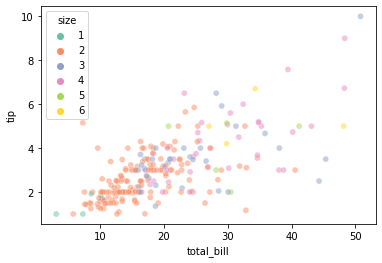

In [12]:
#색상변경의 예, alpha는 투명도 설정
sns.scatterplot(x="total_bill",y="tip",data=tips,hue="size",palette="Set2",
                alpha=0.5)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

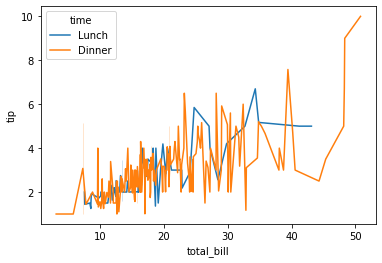

In [14]:
# line plot만들어 보기
sns.lineplot(x="total_bill",y="tip",data=tips,hue="time")

#tips데이터가 line plot에는 맞지 않는것같다 ㅎㅎ

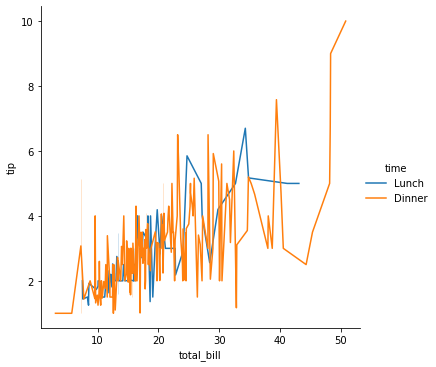

In [16]:
sns.relplot(x="total_bill",y="tip",data=tips,kind="line",hue="time")

### - relplot()과 scatterplot(),lineplot() 의 차이점은?  
### (맞게 이해한건지? 물어보자???)

relplot()은 scatterplot()과 lineplot()의 상위개념의 함수이다.  
문법은 scatterplot()과 lineplot() 문법을 그대로 사용가능하다.  

FacetGrid와 AxesSubplot으로 구분할수 있다.  
FacetGrid에 관계형 플롯을 그릴수 있는 인터페이스 기능을 가능케 하는것이 relplot()함수라고 할수 있다.  

    relplot()함수는 하위집합의 의미론적 맵핑 (semantic mappings)을 사용하여 두변수 간의 관계를 보여주는 동시에 여러축을 기준으로 설정 가능한 엑세스를 제공한다.
    kind 파라미터를 별도로 지시하지 않으면 scatterplot으로 출력됨.  
    #kind="line"으로 라인그래프로도 설정가능함.
    
scatterplot()과 lineplot()은 return값이 AxesSubplot 이고,  
relplot()은 return값이 FacetGrid 이다.  

AxesSubplot은 1장의 그림에 모든것을 담고,  
FacetGrid 는 여러개의 AxesSubplot 을 포함한다고 보면된다.  

lineplot(),scatterplot()의 그래프는 ㅁ 모양으로 닫혀있고  
relplot() 은 ㄴ 모양으로 위가 뚫려있다(!)

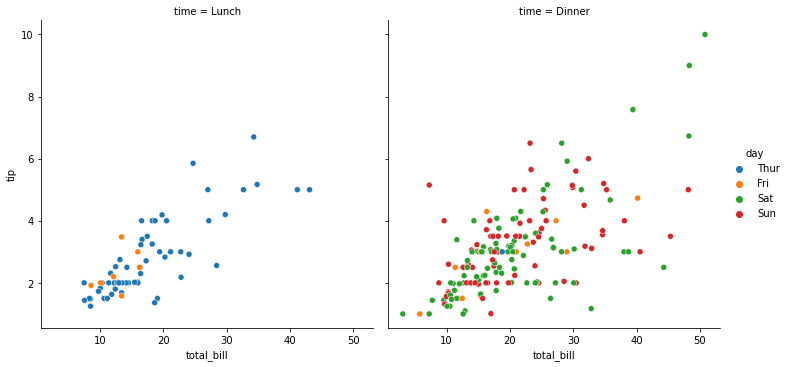

In [19]:
#relplot에서 col을 time으로 축을 추가 설정이 가능하다.
sns.relplot(x="total_bill",y="tip",data=tips,hue="day",col="time")

AttributeError: 'PathCollection' object has no property 'col'

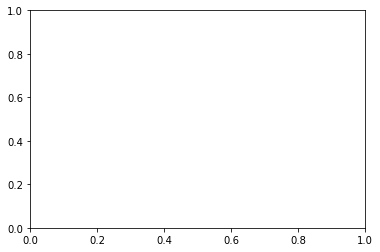

In [20]:
#같은 명령으로 scatterplot()으로 진행시 오류가 난다.
sns.scatterplot(x="total_bill",y="tip",data=tips,hue="day",col="time")

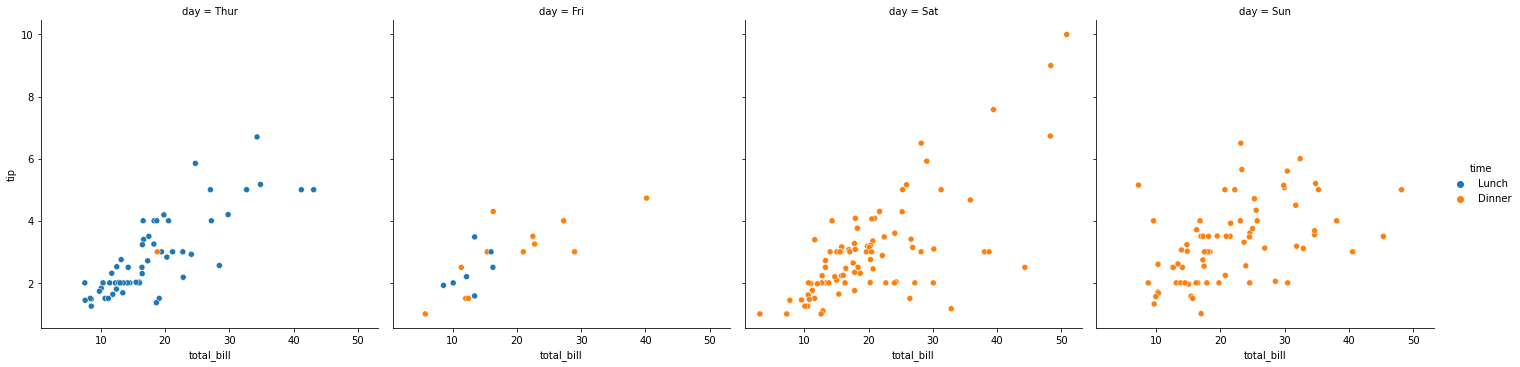

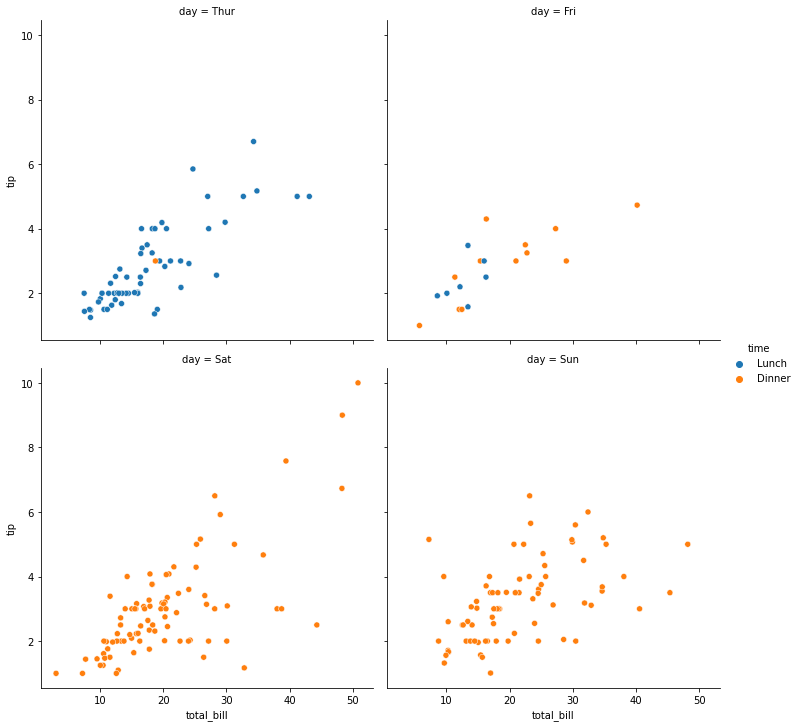

In [22]:
#col에 할당된 변수에 여러 레벨이나 수준이 있는경우 
#여러행에 걸쳐 묶어(wrapping) 줄수 있다
sns.relplot(x="total_bill",y="tip",data=tips,hue="time",col="day")


#위의 자료는 4가지 그래프가 가로로 길게 출력되면 보기가 좁게 출력된다.
sns.relplot(x="total_bill",y="tip",data=tips,hue="time",col="day",col_wrap=2)
#그래서 2개씩 wrapping하여 좀더 보기 쉽게 할수 있도록 한다.
# 이맛에 relplot()을 쓰는것 같다 (?!)

In [24]:
#lineplot을 써보기위해 다른 샘플 데이터를 불러보자
mpg=sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


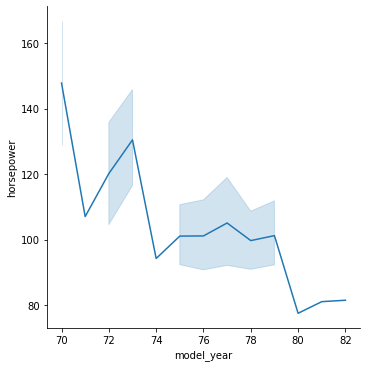

In [25]:
sns.relplot(x="model_year",y="horsepower",data=mpg,kind="line")

- ci에 대해서...  
  ci=각단위에 대한 평균과 95%신뢰구간.  
  연한 파란색으로 칠해진 구간은 신뢰구간(CI)으로 원치 않으면  
  ci=None 하면된다.  
   
  만약에 더 큰 데이터를 사용하는 경우에는 신뢰구간 대신 표준편차를 표시하여  
  각 시점에서 분포의 산포도를 나타내는것이 더 좋은 옵션이 될수있다.  
  이럴때는 ci="sd"를 사용해서 표준편차를 나타낼수 있다.

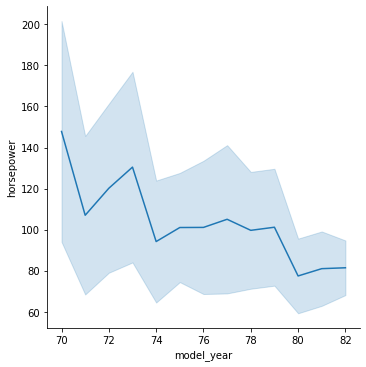

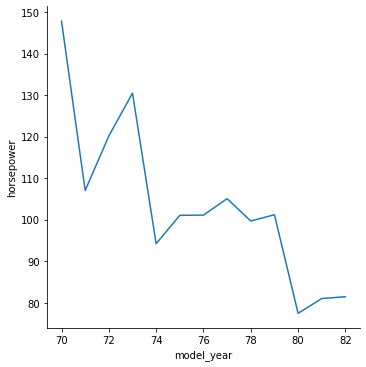

In [32]:
#ci를 표준편차로 바꾸어보자.
sns.relplot(x="model_year",y="horsepower",data=mpg,kind="line",ci="sd")

#그래도 여기서는 보기쉽게 ci는 없에는걸로...
sns.relplot(x="model_year",y="horsepower",data=mpg,kind="line",ci=None)

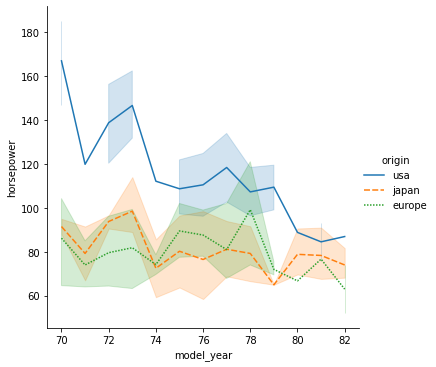

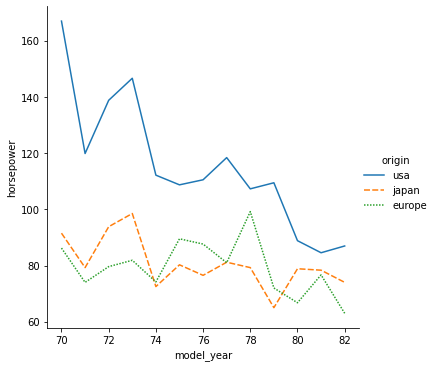

In [39]:
#origin에 따라 표를 좀더 쉽게 볼수 있도록 수정해보자.
#style은 변수에따라 다른 선으로 표현하게 한다.
sns.relplot(x="model_year",y="horsepower",data=mpg,kind="line",
            style="origin",hue="origin")

#ci가 있으니 보기가 좀 편하지 않으니 지워보자.
sns.relplot(x="model_year",y="horsepower",data=mpg,kind="line",
            style="origin",hue="origin",ci=None)

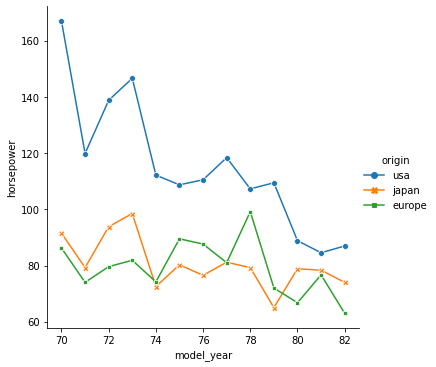

In [30]:
# 점선과 실선을 변경하고 싶을때는 dashes=False or True로 변경할수있다.
# 데이터 포인트에 점(markers)를 찍어주고 싶을때는 markers = True or False 로 수정.

sns.relplot(x="model_year",y="horsepower",data=mpg,kind="line",style="origin",
            hue="origin",ci=None,markers=True,dashes=False)

seaborn의 여러가지 그래프를 참고하려면  
https://seaborn.pydata.org/introduction.html

seaborn의 다양한 설정법을 한번보자!  
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

<AxesSubplot:xlabel='model_year', ylabel='horsepower'>

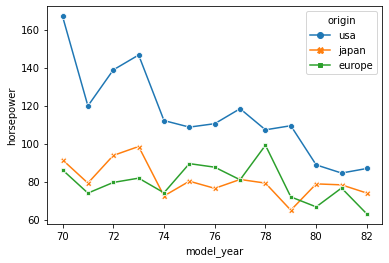

In [34]:
sns.lineplot(x="model_year",y="horsepower",data=mpg,style="origin",
            hue="origin",ci=None,markers=True,dashes=False)

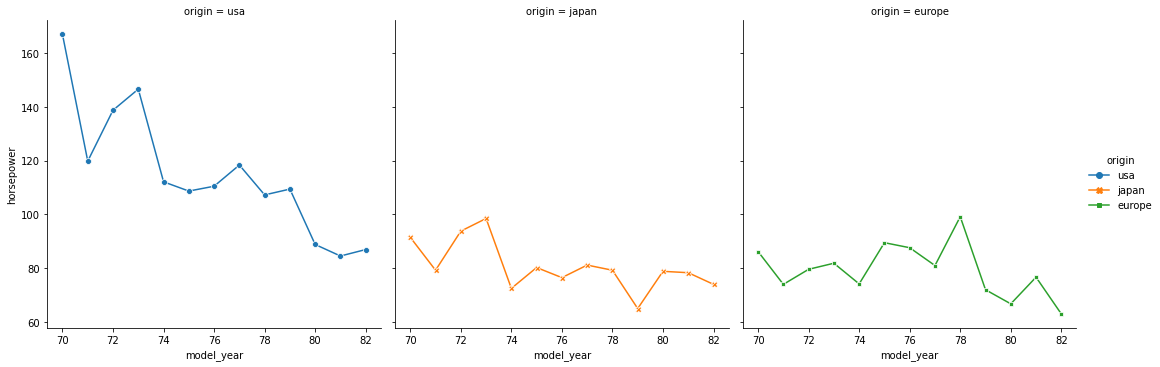

In [35]:
sns.relplot(x="model_year",y="horsepower",data=mpg,kind="line",style="origin",
            hue="origin",ci=None,markers=True,dashes=False,col="origin")

AttributeError: 'Line2D' object has no property 'kind'

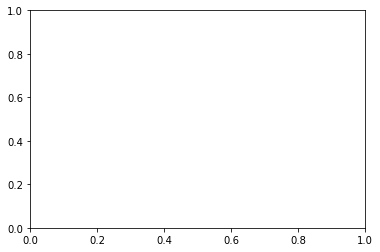

In [37]:
sns.lineplot(x="model_year",y="horsepower",data=mpg,kind="line",style="origin",
            hue="origin",ci=None,markers=True,dashes=False,col="origin")
#역시 마찬가지로 1개 이상의 그림이 나와야 할때는 에러가 뜬다.